<a href="https://colab.research.google.com/github/raus03/Repo/blob/main/AirPassenger_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scalecast==0.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.7 MB 1.6 MB/s 
     |████████████████████████████████| 216 kB 65.9 MB/s 
     |████████████████████████████████| 133 kB 68.9 MB/s 
     |████████████████████████████████| 462 kB 72.9 MB/s 
  Created wheel for scalecast: filename=SCALECAST-0.5.2-py3-none-any.whl size=34474 sha256=5ba641f63abb40b81ab036bb1473f3f78f6b651e7a18f729da9c4ab253ad0f4c
  Stored in directory: /root/.cache/pip/wheels/a2/1d/09/8b03609ca25ec8f03f58343df014e33f15749cf030d84651b3
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=1a5b0a3b7339aba424bcc2c1b725822c65c7d8e10da4173ef7d05a860f95ef3e
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built scalecast eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
   

In [4]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

sns.set(rc={'figure.figsize':(15,8)})

df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'])

In [7]:
f = Forecaster(y=df['#Passengers'], current_dates=df['Month'])
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    CILevel=0.95
    BootstrapSamples=100
)

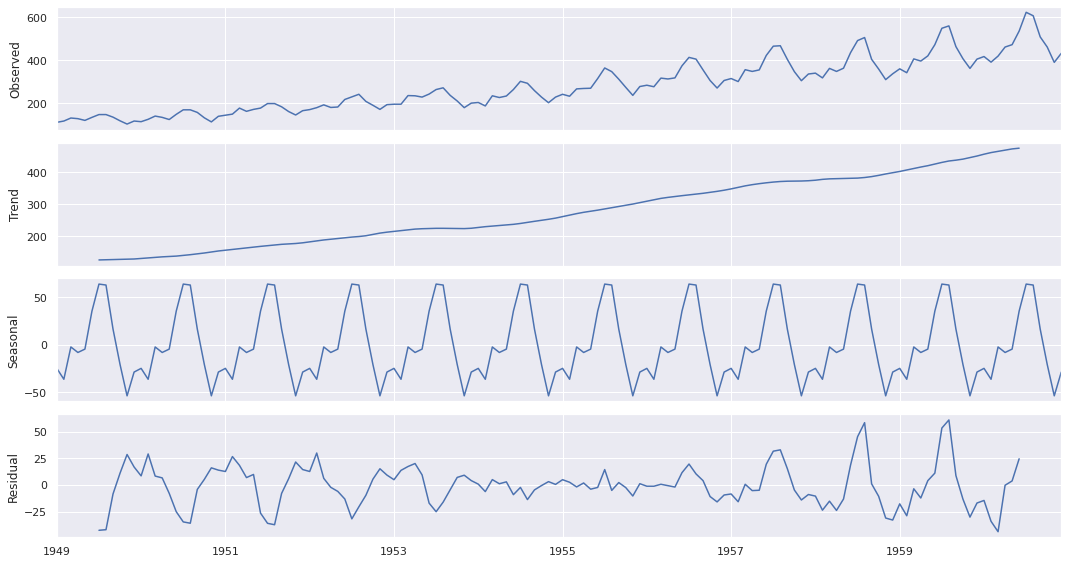

In [8]:
f.seasonal_decompose().plot()
plt.show()

LSTMForecasting

In [9]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

5/5 [==============================] - 1s 5ms/step - loss: 0.3391


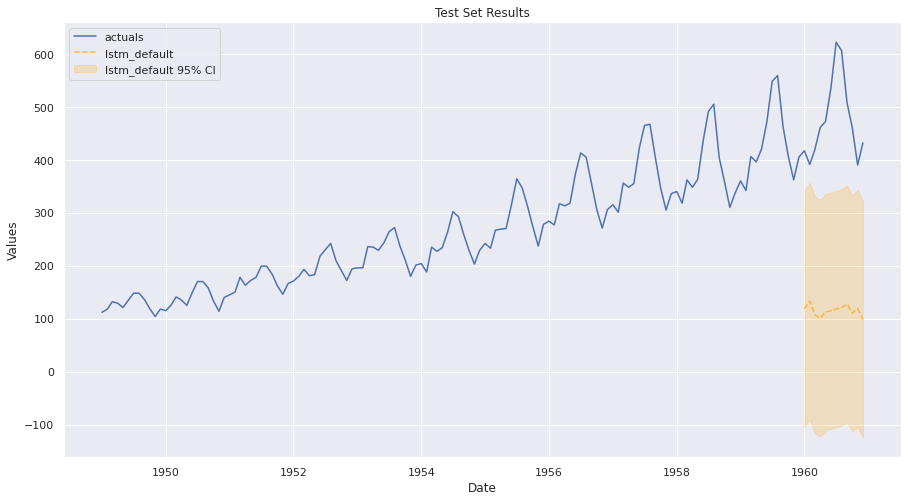

In [10]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

4/4 [==============================] - 2s 6ms/step - loss: 0.4050


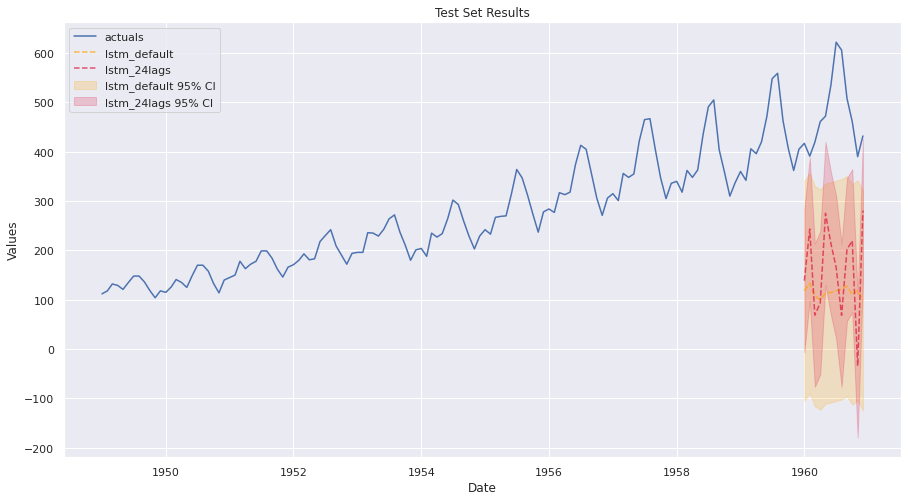

In [11]:
f.manual_forecast(call_me='lstm_24lags', lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
3/3 [==============================] - 2s 226ms/step - loss: 0.4924 - val_loss: 0.2033
Epoch 2/5
3/3 [==============================] - 0s 14ms/step - loss: 0.4858 - val_loss: 0.1986
Epoch 3/5
3/3 [==============================] - 0s 16ms/step - loss: 0.4792 - val_loss: 0.1938
Epoch 4/5
3/3 [==============================] - 0s 14ms/step - loss: 0.4725 - val_loss: 0.1890
Epoch 5/5
3/3 [==============================] - 0s 22ms/step - loss: 0.4658 - val_loss: 0.1840
Epoch 1/5
3/3 [==============================] - 2s 342ms/step - loss: 0.4573 - val_loss: 0.1751
Epoch 2/5
3/3 [==============================] - 0s 13ms/step - loss: 0.4463 - val_loss: 0.1682
Epoch 3/5
3/3 [==============================] - 0s 13ms/step - loss: 0.4353 - val_loss: 0.1612
Epoch 4/5
3/3 [==============================] - 0s 15ms/step - loss: 0.4242 - val_loss: 0.1541
Epoch 5/5
3/3 [==============================] - 0s 23ms/step - loss: 0.4128 - val_loss: 0.1468


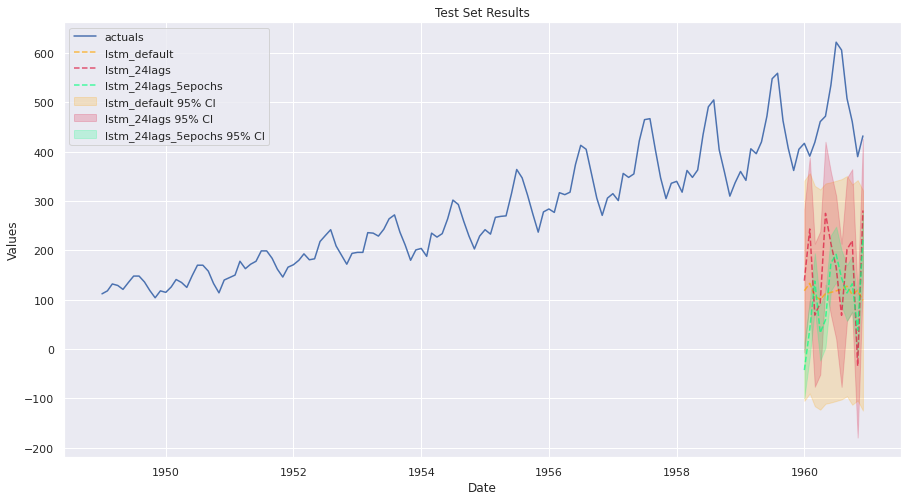

In [12]:
f.manual_forecast(call_me='lstm_24lags_5epochs',lags=24, epochs=5,validation_split=0.2,shuffle=True)
f.plot_test_set(ci=True)

In [13]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Epoch 1/25
3/3 [==============================] - 6s 982ms/step - loss: 0.4570 - val_loss: 0.1788
Epoch 2/25
3/3 [==============================] - 0s 36ms/step - loss: 0.4319 - val_loss: 0.1584
Epoch 3/25
3/3 [==============================] - 0s 39ms/step - loss: 0.4028 - val_loss: 0.1332
Epoch 4/25
3/3 [==============================] - 0s 33ms/step - loss: 0.3664 - val_loss: 0.1024
Epoch 5/25
3/3 [==============================] - 0s 30ms/step - loss: 0.3197 - val_loss: 0.0806
Epoch 6/25
3/3 [==============================] - 0s 28ms/step - loss: 0.2648 - val_loss: 0.0907
Epoch 7/25
3/3 [==============================] - 0s 31ms/step - loss: 0.2141 - val_loss: 0.1327
Epoch 8/25
3/3 [==============================] - 0s 47ms/step - loss: 0.1941 - val_loss: 0.1747
Epoch 9/25
3/3 [==============================] - 0s 28ms/step - loss: 0.1852 - val_loss: 0.1887
Epoch 10/25
3/3 [==============================] - 0s 57ms/step - loss: 0.1736 - val_loss: 0.1771
Epoch 1/25
3/3 [============

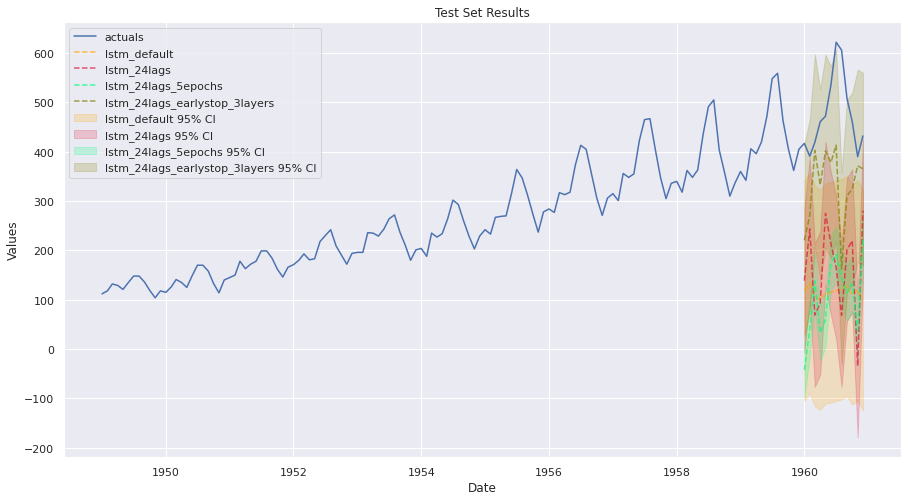

In [14]:
#Let's increase the number of layers in the network to 3
#Let's increase epochs to 25
#Monitor the validation loss value and telling the model to quit after more than 5 iterations in which that doen't improve. This is ealrly stopping
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me = 'lstm_24lags_earlystop_3layers',lags=24, epochs=25, validation_split=0.2,shuffle=True, callbacks=EarlyStopping(monitor='val_loss', patience=5),lstm_layer_sizes=(16,16,16),dropout=(0,0,0))
f.plot_test_set(ci=True)


Epoch 1/15
3/3 [==============================] - 6s 674ms/step - loss: 0.4813 - val_loss: 0.1974
Epoch 2/15
3/3 [==============================] - 0s 24ms/step - loss: 0.3744 - val_loss: 0.1121
Epoch 3/15
3/3 [==============================] - 0s 25ms/step - loss: 0.2254 - val_loss: 0.1573
Epoch 4/15
3/3 [==============================] - 0s 25ms/step - loss: 0.1545 - val_loss: 0.0535
Epoch 5/15
3/3 [==============================] - 0s 28ms/step - loss: 0.1364 - val_loss: 0.0628
Epoch 6/15
3/3 [==============================] - 0s 27ms/step - loss: 0.1297 - val_loss: 0.1027
Epoch 7/15
3/3 [==============================] - 0s 24ms/step - loss: 0.1259 - val_loss: 0.0711
Epoch 8/15
3/3 [==============================] - 0s 24ms/step - loss: 0.1018 - val_loss: 0.0576
Epoch 9/15
3/3 [==============================] - 0s 26ms/step - loss: 0.1022 - val_loss: 0.0604
Epoch 10/15
3/3 [==============================] - 0s 23ms/step - loss: 0.0959 - val_loss: 0.0591
Epoch 11/15
3/3 [===========

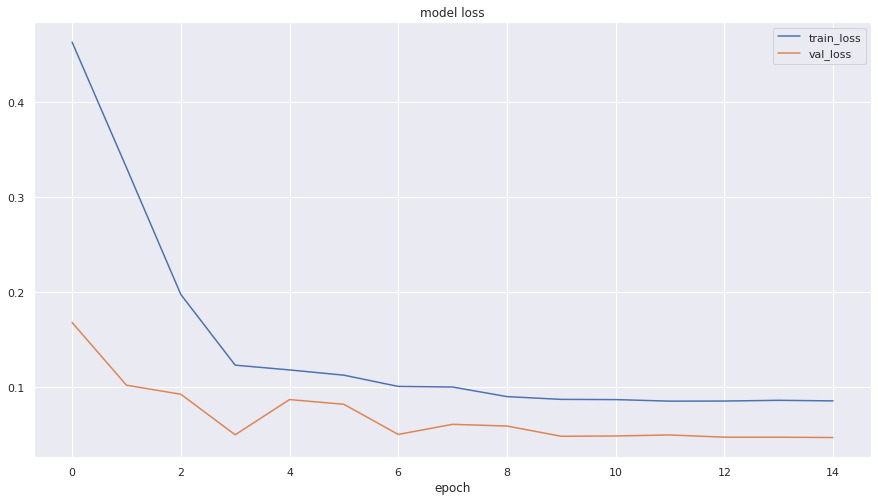

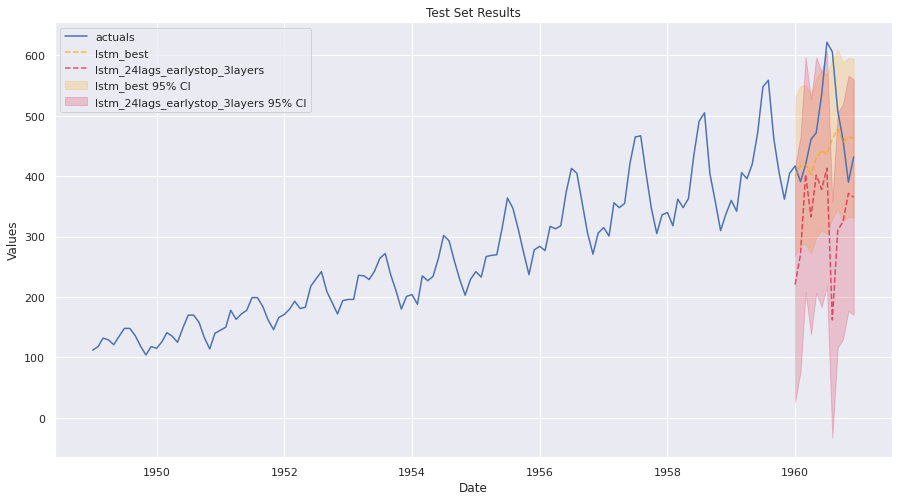

In [15]:
f.manual_forecast(call_me="lstm_best",lags=36,batch_size=32, epochs=15, validation_split=0.2, shuffle=True,activation='tanh', optimizer="Adam", learning_rate=0.001, lstm_layer_sizes=(72,)*4, dropout=(0,)*4, plot_loss=True)
f.plot_test_set(order_by="LevelTestSetMAPE",models="top_2", ci=True)

In [16]:
f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data

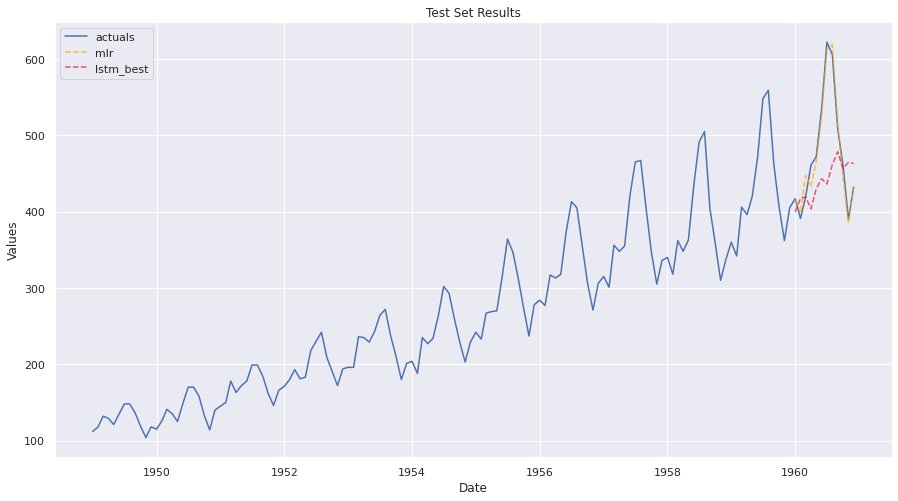

In [18]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

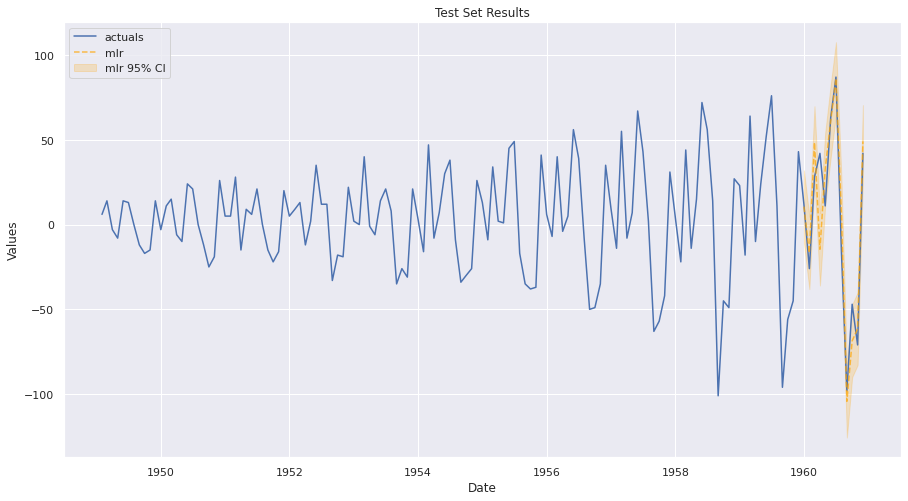

In [19]:
f.plot_test_set(models="mlr", ci=True)

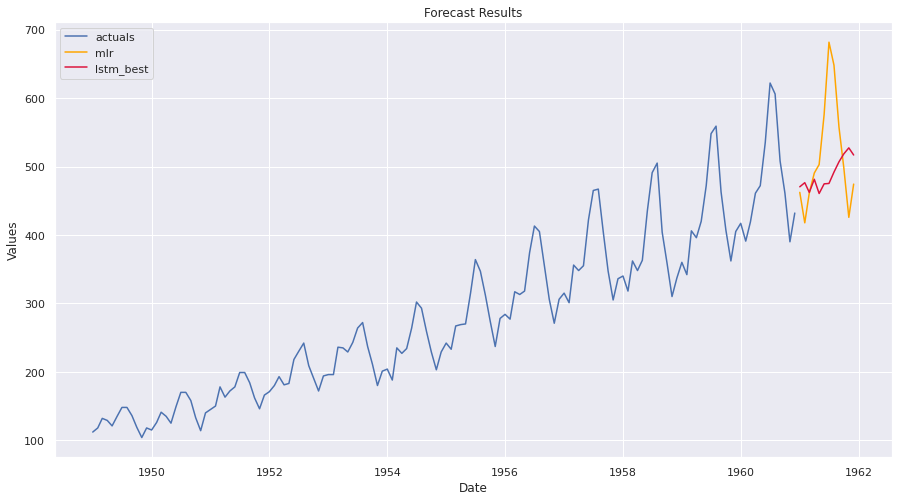

In [20]:
f.plot(models=['mlr', 'lstm_best'],order_by='LevelTestSetMAPE',level=True)

In [21]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,mlr,0.023420,13.932124,0.964960,True
1,lstm_best,0.113678,80.290259,-0.163744,False
2,lstm_24lags_earlystop_3layers,0.291015,183.108731,-5.052708,False
3,lstm_24lags,0.656674,335.519527,-19.322036,False
4,lstm_default,0.752818,368.512965,-23.515297,False
5,lstm_24lags_5epochs,0.789669,379.275043,-24.968098,False
